In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
latest_ratings = pd.read_csv("latest_merlin_ratings.csv", index_col='id')
latest_ratings.shape

(854, 18)

In [3]:
latest_ratings.dtypes

name                       object
security_type              object
city                       object
state_name                 object
annual_revenue            float64
business_type               int64
staff_pick                  int64
start_date                 object
entity_id                   int64
price_rating              float64
market_rating             float64
team_rating               float64
performance_rating        float64
overall_rating            float64
differentiation_rating    float64
overall_average           float64
risk_rating                 int64
financials_risk_rating      int64
dtype: object

In [6]:
latest_ratings['business_type'] = latest_ratings['business_type'].astype(str)
latest_ratings['staff_pick'] = latest_ratings['staff_pick'].astype(str)

In [7]:
latest_ratings.head()

,name,security_type,city,state_name,annual_revenue,business_type,staff_pick,start_date,entity_id,price_rating,market_rating,team_rating,performance_rating,overall_rating,differentiation_rating,overall_average,risk_rating,financials_risk_rating
id,,,,,,,,,,,,,,,,,,
1,2XL Swagger Brands,Equity - Common,Austin,Texas,325734.0,277,250,6/5/2020 0:00,55867,1.8,3.1,4.4,3.5,3.7,3.1,3.19,0,0
2,Monetran,Equity - Tokens,Hockessin,Delaware,0.0,66,250,6/5/2020 0:00,55639,4.8,4.8,1.4,1.0,2.9,2.5,2.89,0,0
3,Piestro,Equity - Common,Santa Monica,California,0.0,277,248,6/5/2020 0:00,56026,3.1,3.7,4.2,1.0,3.7,3.7,3.15,0,0
4,Hundy,Convertible Note,Miami,Florida,26815.0,66,250,6/5/2020 0:00,55842,3.7,3.7,2.7,2.9,3.3,2.1,3.02,0,0
5,Snailz,SAFE,New York,New York,69932.0,277,248,6/3/2020 0:00,55599,2.7,3.5,1.8,3.1,2.3,2.5,2.73,0,0


In [9]:
business_type_dict = {
    '0': '',
    '65': 'Life Style',
    '66': 'High Growth',
    '277': 'Growth'
}

staff_pick_dict = {
    '0': '',
    '247': 'Top Deal',
    '248': 'Deal to Watch',
    '249': 'Underweight',
    '250': 'Pass',
    '6163': 'Neutral'
}

latest_ratings['business_type'] = latest_ratings['business_type'].map(business_type_dict)
latest_ratings['staff_pick'] = latest_ratings['staff_pick'].map(staff_pick_dict)

In [10]:
latest_ratings.dtypes

name                       object
security_type              object
city                       object
state_name                 object
annual_revenue            float64
business_type              object
staff_pick                 object
start_date                 object
entity_id                   int64
price_rating              float64
market_rating             float64
team_rating               float64
performance_rating        float64
overall_rating            float64
differentiation_rating    float64
overall_average           float64
risk_rating                 int64
financials_risk_rating      int64
dtype: object

In [11]:
new_df = latest_ratings[['name', 'security_type', 'state_name', 'annual_revenue', 'overall_rating', 'business_type', 'staff_pick', 'start_date']]
new_df.head()

,name,security_type,state_name,annual_revenue,overall_rating,business_type,staff_pick,start_date
id,,,,,,,,
1,2XL Swagger Brands,Equity - Common,Texas,325734.0,3.7,Growth,Pass,6/5/2020 0:00
2,Monetran,Equity - Tokens,Delaware,0.0,2.9,High Growth,Pass,6/5/2020 0:00
3,Piestro,Equity - Common,California,0.0,3.7,Growth,Deal to Watch,6/5/2020 0:00
4,Hundy,Convertible Note,Florida,26815.0,3.3,High Growth,Pass,6/5/2020 0:00
5,Snailz,SAFE,New York,69932.0,2.3,Growth,Deal to Watch,6/3/2020 0:00


In [19]:
states_pvt_table = new_df.pivot_table(values=['overall_rating'], index=['state_name'], aggfunc=[np.mean, lambda x: len(x.unique())])
states_pvt_table

,mean,<lambda>
,overall_rating,overall_rating
state_name,,
Alabama,2.100000,1.0
Arizona,2.720000,7.0
California,3.074684,20.0
Colorado,2.540000,10.0
Connecticut,2.466667,3.0
Delaware,1.688889,5.0
District of Columbia,2.766667,3.0
Florida,2.518182,18.0


In [20]:
# staff_pick_pvt_table = new_df.pivot_table(values=['staff_pick'], index=['staff_pick'], aggfunc='count')
# staff_pick_pvt_table

In [21]:
staff_pick_count = new_df.groupby('staff_pick')['staff_pick'].count()
staff_pick_count

staff_pick
                   2
Deal to Watch    150
Neutral           78
Pass             550
Top Deal          33
Underweight       41
Name: staff_pick, dtype: int64

In [22]:
count_test = new_df['staff_pick'].value_counts()
count_test

Pass             550
Deal to Watch    150
Neutral           78
Underweight       41
Top Deal          33
                   2
Name: staff_pick, dtype: int64

In [23]:
overall_rating = new_df['overall_rating']

overallrating_bool = overall_rating > 4
overallrating_bool

id
1       False
2       False
3       False
4       False
5       False
6       False
7       False
9        True
10      False
11       True
14       True
15      False
16       True
17      False
18       True
21       True
22      False
23       True
25      False
26      False
28      False
29       True
30      False
32      False
35      False
36       True
37       True
38       True
39      False
40       True
        ...  
2368    False
2369    False
2372    False
2375    False
2376     True
2380    False
2381    False
2382    False
2383    False
2384    False
2386    False
2387    False
2388    False
2389    False
2390     True
2391    False
2392     True
2395    False
2396    False
2399    False
2400    False
2402     True
2404     True
2406     True
2407    False
2408     True
2410    False
2411    False
2413    False
2422    False
Name: overall_rating, Length: 854, dtype: bool

In [72]:
# to get the count of ratings between 2 values

bucket_1_2 = new_df['overall_rating'][new_df['overall_rating'] <= 2].value_counts()
ratings_count_12 = bucket_1_2.sum()
ratings_count_12

239

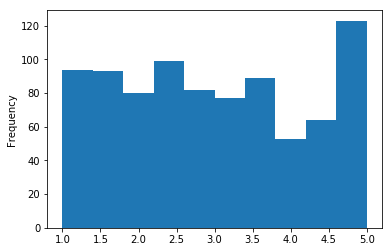

In [52]:
import seaborn as sns

new_df['overall_rating'].plot(kind='hist')

In [63]:
bucket_2_3 = new_df['overall_rating'][(new_df['overall_rating'] >= 2) & (new_df['overall_rating'] <= 3)].value_counts()
bucket_2_3

2.3    51
2.9    48
2.5    48
2.7    34
2.1    28
Name: overall_rating, dtype: int64

In [64]:
bucket_3_4 = new_df['overall_rating'][(new_df['overall_rating'] >= 3) & (new_df['overall_rating'] <= 4)].value_counts()
bucket_3_4

3.9    53
3.7    48
3.5    41
3.1    40
3.3    37
Name: overall_rating, dtype: int64

In [65]:
bucket_4_5 = new_df['overall_rating'][new_df['overall_rating'] >= 4].value_counts()
bucket_4_5

5.0    42
4.8    41
4.6    40
4.4    35
4.2    29
Name: overall_rating, dtype: int64

In [68]:
# if i want df with the bucket and filtered by staff pick

bucket_4_5 = new_df[(new_df['overall_rating'] >= 4) & (new_df['staff_pick'] == 'Top Deal')] 
bucket_4_5

,name,security_type,state_name,annual_revenue,overall_rating,business_type,staff_pick,start_date
id,,,,,,,,
11,goDeskless,Convertible Note,California,637284.00,4.8,High Growth,Top Deal,6/2/2020 0:00
38,Kangaroo,SAFE,New York,475507.00,4.6,High Growth,Top Deal,5/22/2020 0:00
119,Elemeno Health,SAFE,NaN,603763.00,5.0,High Growth,Top Deal,4/14/2020 0:00
129,Next Door Photos,Equity - Common,NaN,931839.00,4.8,Growth,Top Deal,4/3/2020 0:00
151,Mevo Inc.,Equity - Preferred,NaN,4428320.00,5.0,High Growth,Top Deal,3/25/2020 0:00
154,Digital Brands Group,Equity - Preferred,California,30790000.00,4.4,Growth,Top Deal,3/24/2020 0:00
168,R3 Printing,Convertible Note,NaN,0.00,5.0,High Growth,Top Deal,3/18/2020 0:00
176,Axle.ai,SAFE,NaN,853807.00,5.0,High Growth,Top Deal,3/16/2020 0:00
205,Ample Foods,SAFE,California,2934247.00,4.6,Growth,Top Deal,3/4/2020 0:00


In [70]:
# if i want the number of values

count45top = bucket_4_5['overall_rating'].value_counts()
count45top

5.0    10
4.8     4
4.6     3
4.4     2
4.2     2
Name: overall_rating, dtype: int64